In [162]:
import pandas as pd
from bs4 import BeautifulSoup
import string
import time
from fake_useragent import UserAgent
import requests
import re
from datetime import datetime
ua = UserAgent()

In [11]:
def remove_punctuation(x):
    x = str(x)
    return x.translate(str.maketrans({a:None for a in string.punctuation}))

In [233]:
def get_soup(url, timeout=5):
    headers  = {'User-Agent':ua.random}
    try:
        response = requests.get(url,headers=headers)
    except:
        print("FAILED "+ url)
        return 0
    attempts = 0
    while(not response.ok):
            print((url+' failed with code: '+str(response.status_code)))
            if attempts > timeout:
                raise Exception(url+' failed with code: '+str(response.status_code))
            response = requests.get(url)
            attempts += 1
    page = response.text
    soup = BeautifulSoup(page,'lxml')
    return soup

In [208]:
data = pd.read_pickle('2010-2016_omdb.pkl')

In [43]:
test = data.iloc[:10,:]
test.head()

,imdb_rating,metascore,opening,opening_theatres,release_date,runtime,studio,title,total_gross,total_theatres,year
6,7.2,44,166007347,4242,2016-03-25,151 min,WB,Batman v Superman: Dawn of Justice,320495804,4256,2016
7,8.3,65,132434639,3558,2016-02-12,108 min,Fox,Deadpool,361274848,3856,2016
8,8.1,78,103261464,4028,2016-04-15,105 min,BV,The Jungle Book,202218804,4028,2016
9,8.4,78,75063401,3827,2016-03-04,108 min,BV,Zootopia,317554942,3959,2016
10,7.4,66,41282042,3955,2016-01-29,95 min,Fox,Kung Fu Panda 3,141692280,3987,2016


In [31]:
def get_torrent_data(title):
    title = remove_punctuation(title)
    title = title.replace(' ','%20')
    url = 'https://thepiratebay.se/search/'+title+'/0/99/200'
    
    try:
        data = pd.read_html(url)[0]
        return data
    except:
        print(title+' not found on The Pirate Bay')

get_torrent_data('Batman v Superman: Dawn of Justice')

,Type,"Name (Order by: Uploaded, Size, ULed by, SE, LE) View: Single / Double",SE,LE
0,Video (Movies),Batman v Superman: Dawn of Justice 2016 NEW HD...,3678,1875
1,Video (Movies),Batman v Superman: Dawn of Justice (2016) CAMR...,1072,17
2,Video (Movies),Batman v Superman Dawn of Justice 2016 - 720p ...,456,65
3,Video (Movies),Batman v Superman Dawn Of Justice (2016) x264 ...,416,155
4,Video (Movies),Batman.v.Superman.Dawn.of.Justice.2016.TS.XviD...,409,192
5,Video (Movies),Batman.v.Superman.Dawn.of.Justice.2016.CAM.Xvi...,161,33
6,Video (HD - Movies),Batman v Superman-Dawn of Justice 2016 720P HD...,138,81
7,Video (Movies),Batman vs Superman Dawn of Justice (2016) HDTS...,120,19
8,Video (Movies),Batman v Superman: Dawn of Justice (2016) 720p...,75,12
9,Video (Movies),Batman.v.Superman.Dawn.of.Justice.2016.TS.v2.x...,71,34


In [78]:
url = 'https://thepiratebay.se/search/jurassic%20world%202015/0/4/0'
soup = get_soup(url)

In [202]:
day = datetime.today()
day.year = 2011
day

AttributeError: attribute 'year' of 'datetime.date' objects is not writable

In [232]:
def get_torrent_stats(df_row):
    title = remove_punctuation(df_row.title)
    title = title.replace(' ','%20')
    url = 'https://thepiratebay.se/search/'+str(title)+'%20'+str(df_row.year)+'/0/4/0'
    print(df_row.title)
    soup = get_soup(url)
    
    
    time.sleep(0.5)
    
    if soup == 0:
        return df_row
    
    activity = 0
    num_torrents = 0
    for row in soup.find_all('tr')[1:]:
        tds = row.find_all('td')
        #activity += int(tds[2].get_text()) + int(tds[3].get_text())
        text = tds[1].get_text().split('\n')[4].replace('\xa0',' ')
        reg = re.compile('[0-9]+-[0-9]+ [0-9]+\:[0-9]+|[0-9]+-[0-9]+ [0-9]+')
        try:
            date = re.findall(reg, text)[0]
        except:
            date = datetime.today()
        try:
            date = datetime.strptime(date,'%m-%d %Y')
        except:
            try:
                date = datetime.strptime(date+datetime.today().year,'%m-%d %H:%M%Y')
            except:
                date = datetime.today()
        if date <= df_row.release_date:
            num_torrents += 1
            activity += int(tds[2].get_text()) + int(tds[3].get_text())
    df_row['num_torrents'] = num_torrents
    df_row['torrent_activity'] = activity
    return df_row

In [167]:
row = soup.find_all('tr')[1]
text = row.find_all('td')[1].get_text().split('\n')[4].replace('\xa0',' ')
reg = re.compile('[0-9]+-[0-9]+ [0-9]+\:[0-9]+|[0-9]+-[0-9]+ [0-9]+')
date = re.findall(reg, text)[0]
try:
    date = datetime.strptime(date,'%m-%d %Y')
except:
    date = datetime.strptime(date,'%m-%d %H:%M')




In [71]:
def get_torrent_activity(row):
    title = remove_punctuation(row.title)
    title = title.replace(' ','%20')
    url = 'https://thepiratebay.se/search/'+title+'%20'+str(row.year)+'/0/4/0'
    soup = get_soup('url')
    time.sleep(0.2)
    
    row['torrent_count'] = int(re.findall('(?<=approx )(\d*)(?!found)', 
                                          soup.find('h2').get_text())[0])
    
    df = get_torrent_data(row.title+' '+str(row.year))
    row['torrent_count'] = len(df)
    row['torrent_activity'] = df.SE.sum()+df.LE.sum()
    return row

In [27]:
def get_torrent_count(df):
    return len(df)

get_torrent_count('Batman v Superman: Dawn of Justice')

30

In [223]:
test = test.apply(lambda x: get_torrent_stats(x),axis = 1)

Batman v Superman: Dawn of Justice
Deadpool
The Jungle Book
Zootopia
Kung Fu Panda 3
Ride Along 2
The Divergent Series: Allegiant
10 Cloverfield Lane
The Boss
London Has Fallen


In [224]:
test

,imdb_rating,metascore,opening,opening_theatres,release_date,runtime,studio,title,total_gross,total_theatres,year,torrent_count,torrent_activity,num_torrents
6,7.2,44,166007347,4242,2016-03-25,151 min,WB,Batman v Superman: Dawn of Justice,320495804,4256,2016,30,2,3
7,8.3,65,132434639,3558,2016-02-12,108 min,Fox,Deadpool,361274848,3856,2016,30,0,0
8,8.1,78,103261464,4028,2016-04-15,105 min,BV,The Jungle Book,202218804,4028,2016,30,0,1
9,8.4,78,75063401,3827,2016-03-04,108 min,BV,Zootopia,317554942,3959,2016,30,1,1
10,7.4,66,41282042,3955,2016-01-29,95 min,Fox,Kung Fu Panda 3,141692280,3987,2016,30,2,3
11,5.9,32,35243095,3175,2016-01-15,102 min,Uni.,Ride Along 2,90862685,3192,2016,30,1,1
12,NaN,NaN,29027348,3740,2016-03-18,NaN,LG/S,The Divergent Series: Allegiant,65153410,3740,2016,10,8,2
13,7.7,76,24727437,3391,2016-03-11,103 min,Par.,10 Cloverfield Lane,70850876,3427,2016,20,0,0
14,5.0,40,23586645,3480,2016-04-08,99 min,Uni.,The Boss,50851395,3495,2016,19,1,1
15,6.2,28,21635601,3490,2016-03-04,99 min,Focus,London Has Fallen,61759435,3492,2016,30,1,1


In [234]:
data = data.apply(lambda x: get_torrent_stats(x), axis=1)
data

Batman v Superman: Dawn of Justice
Deadpool
The Jungle Book
Zootopia
Kung Fu Panda 3
Ride Along 2
The Divergent Series: Allegiant
10 Cloverfield Lane
The Boss
London Has Fallen
Barbershop: The Next Cut
The Huntsman: Winter's War
How to Be Single
My Big Fat Greek Wedding 2
13 Hours: The Secret Soldiers of Benghazi
Miracles from Heaven
Gods of Egypt
Zoolander 2
The Forest
Risen
Hail, Caesar!
Dirty Grandpa
The Boy
The 5th Wave
The Finest Hours
The Witch
God's Not Dead 2
Whiskey Tango Foxtrot
Race
Norm of the North
Triple 9
Eddie the Eagle
The Choice
Fifty Shades of Black
Criminal
Pride and Prejudice and Zombies
Hardcore Henry
The Perfect Match
Meet the Blacks
The Young Messiah
The Brothers Grimsby
Compadres
Fan
The Other Side of the Door
A Hologram for the King
Demolition
Kapoor & Sons - Since 1921
The Mermaid (Mei ren yu)
Busco Novio Para Mi Mujer
Where to Invade Next
Jane Got a Gun
Ip Man 3
Neerja
Wazir
2016 Oscar Nominated Short Films
Ki & Ka
Elvis & Nixon
The Bronze
Fitoor
Everybody W

,imdb_rating,metascore,num_torrents,opening,opening_theatres,release_date,runtime,studio,title,torrent_activity,total_gross,total_theatres,year
6,7.2,44,3,166007347,4242,2016-03-25,151 min,WB,Batman v Superman: Dawn of Justice,2,320495804,4256,2016
7,8.3,65,0,132434639,3558,2016-02-12,108 min,Fox,Deadpool,0,361274848,3856,2016
8,8.1,78,1,103261464,4028,2016-04-15,105 min,BV,The Jungle Book,0,202218804,4028,2016
9,8.4,78,1,75063401,3827,2016-03-04,108 min,BV,Zootopia,3,317554942,3959,2016
10,7.4,66,3,41282042,3955,2016-01-29,95 min,Fox,Kung Fu Panda 3,2,141692280,3987,2016
11,5.9,32,0,35243095,3175,2016-01-15,102 min,Uni.,Ride Along 2,0,90862685,3192,2016
12,NaN,NaN,2,29027348,3740,2016-03-18,NaN,LG/S,The Divergent Series: Allegiant,8,65153410,3740,2016
13,7.7,76,0,24727437,3391,2016-03-11,103 min,Par.,10 Cloverfield Lane,0,70850876,3427,2016
14,5.0,40,1,23586645,3480,2016-04-08,99 min,Uni.,The Boss,1,50851395,3495,2016
15,6.2,28,1,21635601,3490,2016-03-04,99 min,Focus,London Has Fallen,4,61759435,3492,2016


In [247]:
%matplotlib inline
temp = data

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x116567dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x11655f940>,
 'fliers': [<matplotlib.lines.Line2D at 0x11658cac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11658c2b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x116567f60>,
  <matplotlib.lines.Line2D at 0x116587a20>]}

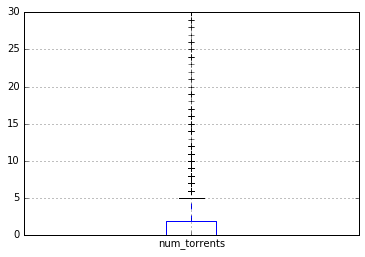

In [248]:
temp.boxplot('num_torrents')

In [246]:
pd.to_pickle(data,'2010-2016_tpb.pkl')